In [286]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,r2_score,mean_absolute_percentage_error
)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random as rnd
from sklearn.decomposition import PCA
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import neptune
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
import optuna
import neptune
from neptune_optuna import NeptuneCallback


In [287]:
df_boston=pd.read_csv('C:\\Users\\kiril\\Downloads\\Telegram Desktop\\BostonHousing 2.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [288]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [289]:
df_boston=df_boston.dropna()

In [290]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [291]:
X_boston=df_boston.drop(['medv'],axis=1)
y_boston=df_boston['medv']

In [292]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(
    X_boston, y_boston, random_state=42, test_size=0.2
)



In [293]:
scaler_boston=StandardScaler()
X_train_scaled_boston=scaler_boston.fit_transform(X_train_boston)
X_test_scaled_boston=scaler_boston.transform(X_test_boston)


In [294]:
pca_boston=PCA()
pca_boston.fit_transform(X_train_scaled_boston)

array([[ 2.86865849,  0.45892677, -0.03778806, ..., -0.25488474,
         0.17929979, -0.0913963 ],
       [ 0.52401652, -0.25317188, -2.04191776, ..., -0.04469517,
         0.05447555,  0.07222612],
       [-1.21755915,  0.30292582, -1.19323138, ..., -0.09684296,
         0.3872695 , -0.03115836],
       ...,
       [-4.79334455,  2.24164151,  0.49843414, ...,  1.34512331,
         0.83800322, -0.68784014],
       [ 3.87859039,  0.93146365, -0.00870598, ..., -0.12436791,
         0.55379986, -0.00835374],
       [ 0.59259092, -0.40129322, -1.58966512, ..., -0.51816465,
        -0.38024072,  0.34930445]], shape=(400, 13))

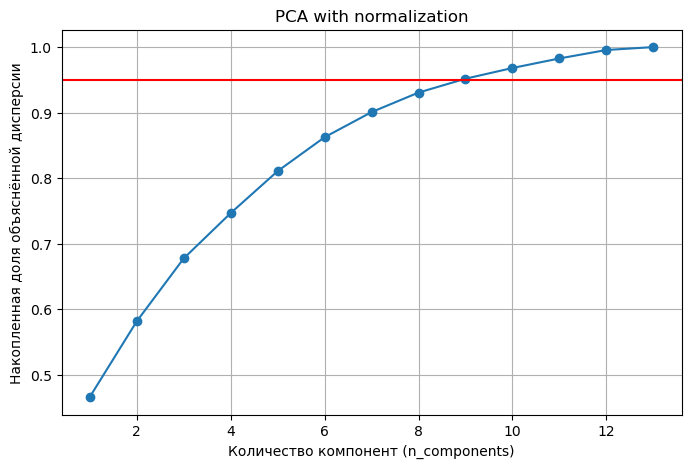

In [295]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, X_boston.shape[1]+1,1), np.cumsum(pca_boston.explained_variance_ratio_
), marker='o')
plt.axhline(y=0.95,color='red')
plt.title("PCA with normalization")
plt.xlabel("Количество компонент (n_components)")
plt.ylabel("Накопленная доля объяснённой дисперсии")
plt.grid(True)
plt.show()

In [296]:
pca_boston=PCA(n_components=9)
X_train_pca_boston=pca_boston.fit_transform(X_train_scaled_boston)
X_test_pca_boston=pca_boston.transform(X_test_scaled_boston)

In [297]:
model = Sequential()
model.add(Dense(36, input_shape=(9,), activation='leaky_relu'))
model.add(Dense(18,activation='leaky_relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train_pca_boston, y_train_boston, epochs=80, batch_size=16, verbose=1,validation_split=0.1)

train_mse = history.history['loss']
train_mae = history.history['mae']

min_train_mse = min(train_mse)
min_train_mse_epoch = train_mse.index(min_train_mse) + 1

min_train_mae = min(train_mae)
min_train_mae_epoch = train_mae.index(min_train_mae) + 1

test_loss, test_mae = model.evaluate(X_test_pca_boston, y_test_boston, verbose=0)


print(f'min train MSE: {min_train_mse} (эпоха {min_train_mse_epoch})')
print(f'min train MAE: {min_train_mae} (эпоха {min_train_mae_epoch})')


print(f"MSE на тесте: {test_loss}")
print(f"MAE на тесте: {test_mae}")

c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 581.8116 - mae: 22.3555 - val_loss: 508.9803 - val_mae: 21.1082
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 524.6132 - mae: 21.1430 - val_loss: 435.4684 - val_mae: 19.3763
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 437.8014 - mae: 19.0685 - val_loss: 327.8307 - val_mae: 16.5446
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 313.5330 - mae: 15.7406 - val_loss: 187.9388 - val_mae: 12.0874
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 166.6043 - mae: 10.9281 - val_loss: 69.2238 - val_mae: 6.8032
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.4877 - mae: 6.1706 - val_loss: 34.4158 - val_mae: 5.0686
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.9569 - mae: 4.1783 - val_loss: 34.4780 - val_mae: 4.5955
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.5250 - mae: 3.7231 - val_loss: 31.5303 - val_mae: 3.9972
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━

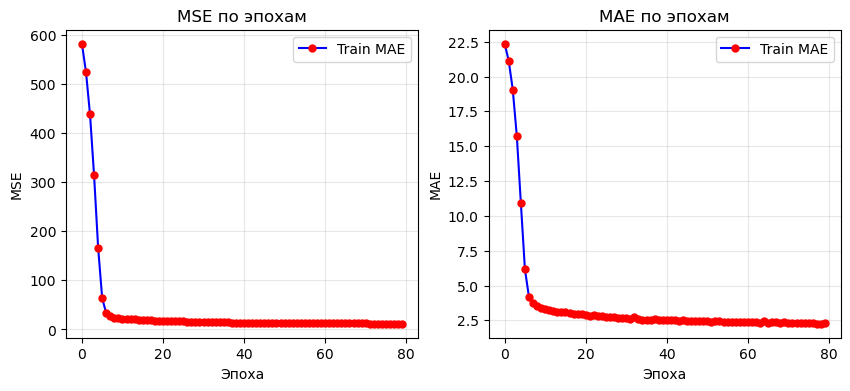

In [298]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_mse, label='Train MAE', color='blue',marker='o',markersize=5,markeredgecolor='red',markerfacecolor='red')
plt.title('MSE по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid(True,alpha=0.3)


plt.subplot(1,2,2)
plt.plot(train_mae, label='Train MAE', color='blue',marker='o',markersize=5,markeredgecolor='red',markerfacecolor='red')
plt.title('MAE по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True,alpha=0.3)



In [299]:
reg=LinearRegression().fit(X_boston,y_boston)
y_pred_boston = reg.predict(X_boston)
mse_linreg_boston = mean_squared_error(y_boston, y_pred_boston)
mae_linreg_boston = mean_absolute_error(y_boston, y_pred_boston)

print(f"MSE: {mse_linreg_boston} vs MAE {mae_linreg_boston}")

MSE: 21.995230571992426 vs MAE 3.2772638118499753


In [300]:
run = neptune.init_run( project="kulikovka/paris-boston-test",
                        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiNjZjNWE3OS1jMzRlLTQyZjAtYmFiNi04ZGU1ZjY0MDAxNzgifQ==", )


space_sequential = {
    'n_layers': hp.quniform('n_layers', 2, 6, 1),
    'neurons': [hp.quniform(f'neurons_l{i}', 6, 36, 6) for i in range(6)],
    'activations': [hp.choice(f'activation_l{i}', ['relu', 'leaky_relu']) for i in range(6)],
    'lr': hp.loguniform('lr', np.log(1e-5), np.log(1e-1)),
    'batch_size': hp.choice('batch_size', [4, 8, 16, 32, 64]),
    'epochs': hp.quniform('epochs', 15, 35, 5),
    'optimizer': hp.choice('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad'])
}


def build_model_boston(params):
    model = Sequential()
    model.add(Input(shape=(9,)))
    n_layers = int(params['n_layers'])
    for i in range(n_layers):
        model.add(Dense(int(params['neurons'][i]), activation=params['activations'][i]))
    model.add(Dense(1))

    if params['optimizer'] == 'Adam':
        opt = Adam(learning_rate=params['lr'])
    elif params['optimizer'] == 'SGD':
        opt = SGD(learning_rate=params['lr'])
    elif params['optimizer'] == 'RMSprop':
        opt = RMSprop(learning_rate=params['lr'])
    else:
        opt = Adagrad(learning_rate=params['lr'])

    model.compile(loss='mse', optimizer=opt, metrics=['mae'])
    return model


def objective_sequential_boston(params):
    model = build_model_boston(params)
    model.fit(
        X_train_pca_boston, y_train_boston,
        epochs=int(params['epochs']),
        batch_size=int(params['batch_size']),
        verbose=0,validation_split=0.1
    )
    _, _ = model.evaluate(X_train_pca_boston, y_train_boston, verbose=0)
    test_loss, _ = model.evaluate(X_test_pca_boston, y_test_boston, verbose=0)
    return {'loss': test_loss, 'status': STATUS_OK}


trials = Trials()
best_sequential_boston = fmin(
    fn=objective_sequential_boston,
    space=space_sequential,
    algo=tpe.suggest,
    max_evals=15,
    trials=trials
)

best_params = {
    'n_layers': int(best_sequential_boston['n_layers']),
    'lr': best_sequential_boston['lr'],
    'batch_size': [4, 8, 16, 32, 64][best_sequential_boston['batch_size']],
    'epochs': int(best_sequential_boston['epochs']),
    'optimizer': ['Adam', 'SGD', 'RMSprop', 'Adagrad'][best_sequential_boston['optimizer']],
    'neurons': [],
    'activations': []
}

for i in range(best_params['n_layers']):
    n_key = f'neurons_l{i}'
    a_key = f'activation_l{i}'
    if n_key in best_sequential_boston:
        best_params['neurons'].append(int(best_sequential_boston[n_key]))
    if a_key in best_sequential_boston:
        best_params['activations'].append(['relu', 'leaky_relu'][best_sequential_boston[a_key]])
for key, value in best_params.items():
    print(f"{key}: {value}")

final_model = build_model_boston(best_params)
history = final_model.fit(
    X_train_pca_boston, y_train_boston,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=0
)

train_loss, train_mae = final_model.evaluate(X_train_pca_boston, y_train_boston, verbose=0)
test_loss, test_mae = final_model.evaluate(X_test_pca_boston, y_test_boston, verbose=0)

print(f"Train MSE: {train_loss} vs Test MSE: {test_loss}")
print(f"Train MAE: {train_mae} vs Test MAE: {test_mae}")

run["best_params/n_layers"] = best_params['n_layers']
run["best_params/lr"] = best_params['lr']
run["best_params/batch_size"] = best_params['batch_size']
run["best_params/epochs"] = best_params['epochs']
run["best_params/optimizer"] = best_params['optimizer']

for i in range(best_params['n_layers']):
    run[f"best_params/layer_{i+1}/neurons"] = best_params['neurons'][i]
    run[f"best_params/layer_{i+1}/activation"] = best_params['activations'][i]

run["final_metrics/train_mse"] = train_loss
run["final_metrics/test_mse"] = test_loss
run["final_metrics/train_mae"] = train_mae
run["final_metrics/test_mae"] = test_mae

run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/kulikovka/paris-boston-test/e/PAR-69
100%|██████████| 15/15 [01:15<00:00,  5.02s/trial, best loss: 11.768757820129395]
n_layers: 3
lr: 0.009461316037864346
batch_size: 16
epochs: 20
optimizer: Adam
neurons: [36, 30, 18]
activations: ['leaky_relu', 'leaky_relu', 'relu']
Train MSE: 12.967476844787598 vs Test MSE: 14.926997184753418
Train MAE: 2.4576423168182373 vs Test MAE: 2.8688251972198486
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 15 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 15 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/kulikovka/paris-boston-test/e/PAR-69/metadata


In [301]:

run = neptune.init_run(
    project="kulikovka/paris-boston-test",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiNjZjNWE3OS1jMzRlLTQyZjAtYmFiNi04ZGU1ZjY0MDAxNzgifQ=="
)

def objective_optuna_boston(trial):
    n_layers = trial.suggest_int("n_layers", 2, 6)
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [4, 8, 16, 32, 64])
    epochs = trial.suggest_int('epochs', 15, 35, 5)
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad'])

    model = Sequential()
    model.add(Input(shape=(9,)))
    for i in range(n_layers):
        neurons = trial.suggest_int(f"neurons_l{i}", 6, 36, step=6)
        activation = trial.suggest_categorical(f"activation_l{i}", ["relu", "leaky_relu"])
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))

    if optimizer == "Adam":
        opt = Adam(learning_rate=lr)
    elif optimizer == "SGD":
        opt = SGD(learning_rate=lr)
    elif optimizer == "RMSprop":
        opt = RMSprop(learning_rate=lr)
    else:
        opt = Adagrad(learning_rate=lr)

    model.compile(loss='mse', optimizer=opt, metrics=['mae'])

    history = model.fit(
        X_train_pca_boston, y_train_boston,
        epochs=epochs, batch_size=batch_size,
        verbose=0, validation_split=0.1
    )

    for i in range(len(history.history['loss'])):
        run["epoch/train_mse"].log(history.history['loss'][i])
        run["epoch/train_mae"].log(history.history['mae'][i])
        run["epoch/val_mse"].log(history.history['val_loss'][i])
        run["epoch/val_mae"].log(history.history['val_mae'][i])

    y_train_pred = model.predict(X_train_pca_boston)
    y_test_pred = model.predict(X_test_pca_boston)

    if np.any(np.isnan(y_train_pred)) or np.any(np.isnan(y_test_pred)):
        return np.inf

    train_mse = mean_squared_error(y_train_boston, y_train_pred)
    test_mse = mean_squared_error(y_test_boston, y_test_pred)
    train_mae = mean_absolute_error(y_train_boston, y_train_pred)
    test_mae = mean_absolute_error(y_test_boston, y_test_pred)

    trial.set_user_attr("train_mse", train_mse)
    trial.set_user_attr("train_mae", train_mae)
    trial.set_user_attr("test_mse", test_mse)
    trial.set_user_attr("test_mae", test_mae)

    return train_mse

study = optuna.create_study(direction='minimize')
study.optimize(objective_optuna_boston, n_trials=15)

best = study.best_trial

run["best_params/n_layers"] = best.params['n_layers']
run["best_params/lr"] = best.params['lr']
run["best_params/batch_size"] = best.params['batch_size']
run["best_params/epochs"] = best.params['epochs']
run["best_params/optimizer"] = best.params['optimizer']

for i in range(best.params['n_layers']):
    run[f"best_params/layer_{i+1}/neurons"] = best.params[f'neurons_l{i}']
    run[f"best_params/layer_{i+1}/activation"] = best.params[f'activation_l{i}']

run["final_metrics/train_mse"] = best.user_attrs['train_mse']
run["final_metrics/test_mse"] = best.user_attrs['test_mse']
run["final_metrics/train_mae"] = best.user_attrs['train_mae']
run["final_metrics/test_mae"] = best.user_attrs['test_mae']

print(f"Train MSE: {best.user_attrs['train_mse']} vs Test MSE: {best.user_attrs['test_mse']}")
print(f"Train MAE: {best.user_attrs['train_mae']} vs Test MAE: {best.user_attrs['test_mae']}")

for param, value in best.params.items():
    print(f"{param} : {value}")

run.stop()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/kulikovka/paris-boston-test/e/PAR-70


[I 2025-10-24 16:33:09,328] A new study created in memory with name: no-name-12cc84c6-7bdc-41f3-9534-ff13cb69258d
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 15, 35, 5)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-10-24 16:33:15,371] Trial 0 finished with value: 14.487316642974676 and parameters: {'n_layers': 6, 'lr': 0.00021520458620849357, 'batch_size': 8, 'epochs': 35, 'optimizer': 'SGD', 'neurons_l0': 6, 'activation_l0': 'relu', 'neurons_l1': 30, 'activation_l1': 'relu', 'neurons_l2': 30, 'activation_l2': 'leaky_relu', 'neurons_l3': 24, 'activation_l3': 'leaky_relu', 'neurons_l4': 12, 'activation_l4': 'leaky_relu', 'neurons_l5': 24, 'activation_l5': 'leaky_relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to b

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2025-10-24 16:33:19,685] Trial 1 finished with value: 17.738617565468044 and parameters: {'n_layers': 4, 'lr': 0.0008010473305383084, 'batch_size': 8, 'epochs': 25, 'optimizer': 'SGD', 'neurons_l0': 24, 'activation_l0': 'relu', 'neurons_l1': 18, 'activation_l1': 'relu', 'neurons_l2': 18, 'activation_l2': 'leaky_relu', 'neurons_l3': 6, 'activation_l3': 'relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in sugg

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-10-24 16:33:23,267] Trial 2 finished with value: 496.65498011139977 and parameters: {'n_layers': 2, 'lr': 0.00013523367914813715, 'batch_size': 8, 'epochs': 15, 'optimizer': 'RMSprop', 'neurons_l0': 30, 'activation_l0': 'leaky_relu', 'neurons_l1': 30, 'activation_l1': 'relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corr

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2025-10-24 16:33:26,886] Trial 3 finished with value: inf and parameters: {'n_layers': 6, 'lr': 0.018648065005763634, 'batch_size': 32, 'epochs': 15, 'optimizer': 'SGD', 'neurons_l0': 6, 'activation_l0': 'leaky_relu', 'neurons_l1': 24, 'activation_l1': 'leaky_relu', 'neurons_l2': 18, 'activation_l2': 'leaky_relu', 'neurons_l3': 30, 'activation_l3': 'relu', 'neurons_l4': 12, 'activation_l4': 'leaky_relu', 'neurons_l5': 12, 'activation_l5': 'leaky_relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2025-10-24 16:33:31,599] Trial 4 finished with value: 604.2098402835962 and parameters: {'n_layers': 5, 'lr': 5.0282744788455976e-05, 'batch_size': 32, 'epochs': 30, 'optimizer': 'Adagrad', 'neurons_l0': 30, 'activation_l0': 'relu', 'neurons_l1': 6, 'activation_l1': 'relu', 'neurons_l2': 6, 'activation_l2': 'leaky_relu', 'neurons_l3': 30, 'activation_l3': 'leaky_relu', 'neurons_l4': 30, 'activation_l4': 'leaky_relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional argum

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-10-24 16:33:37,839] Trial 5 finished with value: 16.763922407860303 and parameters: {'n_layers': 6, 'lr': 0.0021830326184871557, 'batch_size': 8, 'epochs': 25, 'optimizer': 'Adam', 'neurons_l0': 36, 'activation_l0': 'relu', 'neurons_l1': 30, 'activation_l1': 'leaky_relu', 'neurons_l2': 36, 'activation_l2': 'leaky_relu', 'neurons_l3': 18, 'activation_l3': 'relu', 'neurons_l4': 30, 'activation_l4': 'leaky_relu', 'neurons_l5': 12, 'activation_l5': 'relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be giv

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-10-24 16:33:41,513] Trial 6 finished with value: 587.4152461742623 and parameters: {'n_layers': 4, 'lr': 3.6775995922557754e-05, 'batch_size': 16, 'epochs': 15, 'optimizer': 'Adam', 'neurons_l0': 6, 'activation_l0': 'leaky_relu', 'neurons_l1': 24, 'activation_l1': 'relu', 'neurons_l2': 18, 'activation_l2': 'relu', 'neurons_l3': 36, 'activation_l3': 'leaky_relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log']

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


[I 2025-10-24 16:33:50,759] Trial 7 finished with value: 20.42523905934806 and parameters: {'n_layers': 2, 'lr': 0.01797520785336174, 'batch_size': 4, 'epochs': 25, 'optimizer': 'Adam', 'neurons_l0': 12, 'activation_l0': 'relu', 'neurons_l1': 30, 'activation_l1': 'leaky_relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the correspondi

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2025-10-24 16:33:54,390] Trial 8 finished with value: 243.9952847474326 and parameters: {'n_layers': 5, 'lr': 0.001367714335148436, 'batch_size': 8, 'epochs': 15, 'optimizer': 'Adagrad', 'neurons_l0': 12, 'activation_l0': 'leaky_relu', 'neurons_l1': 18, 'activation_l1': 'leaky_relu', 'neurons_l2': 24, 'activation_l2': 'leaky_relu', 'neurons_l3': 24, 'activation_l3': 'leaky_relu', 'neurons_l4': 24, 'activation_l4': 'leaky_relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Posit

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2025-10-24 16:33:59,510] Trial 9 finished with value: 19.416130960636846 and parameters: {'n_layers': 4, 'lr': 0.031336373122563856, 'batch_size': 16, 'epochs': 35, 'optimizer': 'RMSprop', 'neurons_l0': 30, 'activation_l0': 'relu', 'neurons_l1': 6, 'activation_l1': 'leaky_relu', 'neurons_l2': 6, 'activation_l2': 'leaky_relu', 'neurons_l3': 6, 'activation_l3': 'relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log']

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2025-10-24 16:34:03,633] Trial 10 finished with value: 21.83432470483189 and parameters: {'n_layers': 3, 'lr': 0.000225603999473913, 'batch_size': 64, 'epochs': 35, 'optimizer': 'SGD', 'neurons_l0': 12, 'activation_l0': 'relu', 'neurons_l1': 36, 'activation_l1': 'relu', 'neurons_l2': 36, 'activation_l2': 'relu'}. Best is trial 0 with value: 14.487316642974676.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. The

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2025-10-24 16:34:10,633] Trial 11 finished with value: 9.979757733766894 and parameters: {'n_layers': 6, 'lr': 0.0028454303910813057, 'batch_size': 8, 'epochs': 30, 'optimizer': 'Adam', 'neurons_l0': 36, 'activation_l0': 'relu', 'neurons_l1': 36, 'activation_l1': 'leaky_relu', 'neurons_l2': 36, 'activation_l2': 'leaky_relu', 'neurons_l3': 18, 'activation_l3': 'leaky_relu', 'neurons_l4': 6, 'activation_l4': 'relu', 'neurons_l5': 24, 'activation_l5': 'relu'}. Best is trial 11 with value: 9.979757733766894.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be give

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-10-24 16:34:17,861] Trial 12 finished with value: 10.95008989653747 and parameters: {'n_layers': 6, 'lr': 0.005045560740349633, 'batch_size': 8, 'epochs': 30, 'optimizer': 'Adam', 'neurons_l0': 18, 'activation_l0': 'relu', 'neurons_l1': 36, 'activation_l1': 'relu', 'neurons_l2': 30, 'activation_l2': 'leaky_relu', 'neurons_l3': 18, 'activation_l3': 'leaky_relu', 'neurons_l4': 6, 'activation_l4': 'relu', 'neurons_l5': 30, 'activation_l5': 'relu'}. Best is trial 11 with value: 9.979757733766894.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as ke

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-10-24 16:34:23,058] Trial 13 finished with value: 17.207109092419234 and parameters: {'n_layers': 5, 'lr': 0.0053158976123287415, 'batch_size': 64, 'epochs': 30, 'optimizer': 'Adam', 'neurons_l0': 18, 'activation_l0': 'relu', 'neurons_l1': 36, 'activation_l1': 'leaky_relu', 'neurons_l2': 30, 'activation_l2': 'relu', 'neurons_l3': 12, 'activation_l3': 'leaky_relu', 'neurons_l4': 6, 'activation_l4': 'relu'}. Best is trial 11 with value: 9.979757733766894.
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\2583986923.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2025-10-24 16:34:31,026] Trial 14 finished with value: 145.59825218578592 and parameters: {'n_layers': 6, 'lr': 0.07437819857090489, 'batch_size': 4, 'epochs': 30, 'optimizer': 'Adam', 'neurons_l0': 24, 'activation_l0': 'relu', 'neurons_l1': 36, 'activation_l1': 'relu', 'neurons_l2': 30, 'activation_l2': 'leaky_relu', 'neurons_l3': 18, 'activation_l3': 'leaky_relu', 'neurons_l4': 6, 'activation_l4': 'relu', 'neurons_l5': 36, 'activation_l5': 'relu'}. Best is trial 11 with value: 9.979757733766894.


Train MSE: 9.979757733766894 vs Test MSE: 14.103562662024766
Train MAE: 2.049493160009384 vs Test MAE: 2.8293239876775456
n_layers : 6
lr : 0.0028454303910813057
batch_size : 8
epochs : 30
optimizer : Adam
neurons_l0 : 36
activation_l0 : relu
neurons_l1 : 36
activation_l1 : leaky_relu
neurons_l2 : 36
activation_l2 : leaky_relu
neurons_l3 : 18
activation_l3 : leaky_relu
neurons_l4 : 6
activation_l4 : relu
neurons_l5 : 24
activation_l5 : relu
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/kulikovka/paris-boston-test/e/PAR-70/metadata


In [302]:
df_paris=pd.read_csv("C:\\Users\\kiril\\Downloads\\Telegram Desktop\\ParisHousing.csv")
df_paris.head(5)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [303]:
df_paris=df_paris.dropna()

In [304]:
X_paris=df_paris.drop(['price'],axis=1)
y_paris = (df_paris['price'])
scaler_paris=StandardScaler()
X_paris_norm=scaler_paris.fit_transform(X_paris)

y_scaler = StandardScaler()
y_paris_scaled = y_scaler.fit_transform(y_paris.values.reshape(-1,1))

In [305]:
X_train_paris,X_test_paris,y_train_paris,y_test_paris=train_test_split(X_paris_norm,y_paris_scaled,random_state=42,test_size=0.2)


In [306]:
pca_paris=PCA()
pca_paris.fit_transform(X_train_paris)

array([[ 8.91946124e-02, -2.58630405e-02, -4.81790506e-01, ...,
         4.44985440e-01,  2.62122332e+00,  1.16386196e+00],
       [-8.17048259e-01, -1.57607155e-01, -8.41043754e-01, ...,
         6.90209090e-02, -7.33411509e-02, -1.11930931e+00],
       [-5.89539615e-01, -2.80159226e-01, -7.36213846e-01, ...,
         5.69147782e-01, -5.18088500e-01, -6.69471717e-01],
       ...,
       [ 8.03331502e-01, -3.26800389e-01, -5.86650752e-01, ...,
         1.63630953e+00,  5.14128405e-01,  5.41987102e-01],
       [ 8.00578298e-01, -1.00806985e+00,  1.01271156e+00, ...,
         2.07458152e+00,  1.16716740e-03, -7.18477595e-01],
       [-1.38582074e+00, -1.08639134e+00,  1.65351443e+00, ...,
        -1.61467658e+00, -4.39011325e-01, -1.32879204e+00]],
      shape=(8000, 16))

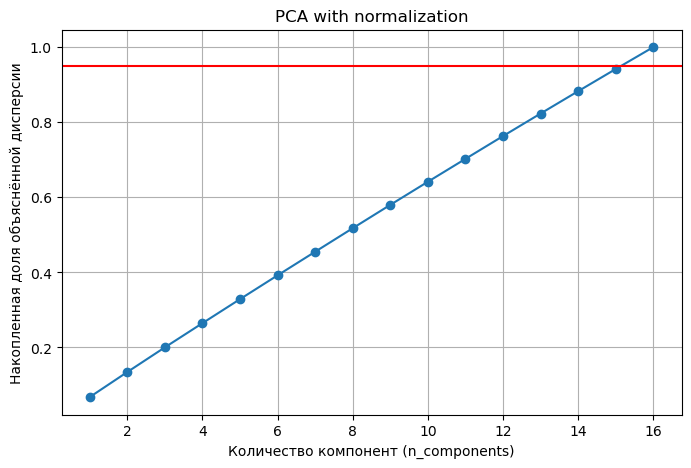

In [307]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, X_paris.shape[1]+1,1), np.cumsum(pca_paris.explained_variance_ratio_
), marker='o')
plt.axhline(y=0.95,color='red')
plt.title("PCA with normalization")
plt.xlabel("Количество компонент (n_components)")
plt.ylabel("Накопленная доля объяснённой дисперсии")
plt.grid(True)
plt.show()

In [308]:
pca_paris = PCA(n_components=15)
X_train_pca_paris = pca_paris.fit_transform(X_train_paris)
X_test_pca_paris = pca_paris.transform(X_test_paris)

In [309]:
model = Sequential([
    Dense(32, input_shape=(15,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(
    X_train_pca_paris, y_train_paris,
    epochs=80, batch_size=10,
    validation_split=0.1, verbose=1
)

train_mse = history.history['loss']
val_mse = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

min_train_mse = min(train_mse)
min_train_mse_epoch = train_mse.index(min_train_mse) + 1
min_val_mse = min(val_mse)
min_val_mse_epoch = val_mse.index(min_val_mse) + 1

min_train_mae = min(train_mae)
min_train_mae_epoch = train_mae.index(min_train_mae) + 1
min_val_mae = min(val_mae)
min_val_mae_epoch = val_mae.index(min_val_mae) + 1

y_train_pred_scaled = model.predict(X_train_pca_paris)
y_test_pred_scaled = model.predict(X_test_pca_paris)

y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled)

y_train_real = y_scaler.inverse_transform(y_train_paris)
y_test_real = y_scaler.inverse_transform(y_test_paris)

train_mae_real = mean_absolute_error(y_train_real, y_train_pred)
train_mse_real = mean_squared_error(y_train_real, y_train_pred)
test_mae_real = mean_absolute_error(y_test_real, y_test_pred)
test_mse_real = mean_squared_error(y_test_real, y_test_pred)

print(f"Train MSE: {min_train_mse} (эпоха {min_train_mse_epoch})")
print(f"Val MSE: {min_val_mse} (эпоха {min_val_mse_epoch})")
print(f"Train MAE: {min_train_mae} (эпоха {min_train_mae_epoch})")
print(f"Val MAE: {min_val_mae} (эпоха {min_val_mae_epoch})")

print(f"Train MSE: {train_mse_real}")
print(f"Train MAE: {train_mae_real}")
print(f"Test MSE: {test_mse_real}")
print(f"Test MAE: {test_mae_real}")

Epoch 1/80


c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2085 - mae: 0.3130 - val_loss: 0.0327 - val_mae: 0.1462
Epoch 2/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0258 - mae: 0.1285 - val_loss: 0.0212 - val_mae: 0.1155
Epoch 3/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0190 - mae: 0.1111 - val_loss: 0.0169 - val_mae: 0.1022
Epoch 4/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0164 - mae: 0.1035 - val_loss: 0.0154 - val_mae: 0.0985
Epoch 5/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0149 - mae: 0.0985 - val_loss: 0.0143 - val_mae: 0.0940
Epoch 6/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - mae: 0.0958 - val_loss: 0.0131 - val_mae: 0.0900
Epoch 7/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - mae: 0.0927 - val_loss: 0.0131 - val_mae: 0.0905
Epoch 8/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0127 - mae: 0.0899 - val_loss: 0.0130 - val_mae: 0.0895
Epoch 9/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0115 

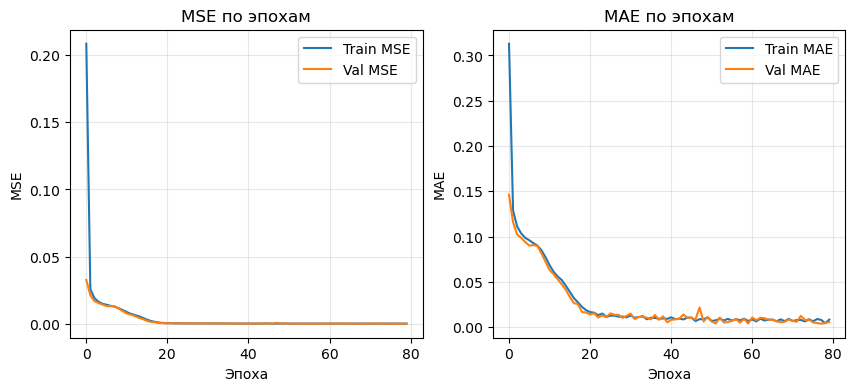

In [310]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_mse, label='Train MSE')
plt.plot(val_mse, label='Val MSE')
plt.title('MSE по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.title('MAE по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [313]:
run = neptune.init_run(
    project="kulikovka/paris-boston-test",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiNjZjNWE3OS1jMzRlLTQyZjAtYmFiNi04ZGU1ZjY0MDAxNzgifQ=="
)

space_sequential = {
    'n_layers': hp.quniform('n_layers', 2, 6, 1),
    'neurons': [hp.quniform(f'neurons_l{i}', 12, 64, 6) for i in range(6)],
    'activations': [hp.choice(f'activation_l{i}', ['relu', 'leaky_relu']) for i in range(6)],
    'lr': hp.loguniform('lr', np.log(1e-5), np.log(1e-1)),
    'batch_size': hp.choice('batch_size', [10,16, 32, 64]),
    'epochs': hp.quniform('epochs', 50, 100, 10),
    'optimizer': hp.choice('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad'])
}

def build_model_paris(params):
    model = Sequential()
    model.add(Input(shape=(15,)))
    n_layers = int(params['n_layers'])
    for i in range(n_layers):
        model.add(Dense(int(params['neurons'][i]), activation=params['activations'][i]))
    model.add(Dense(1))

    if params['optimizer'] == 'Adam':
        opt = Adam(learning_rate=params['lr'])
    elif params['optimizer'] == 'SGD':
        opt = SGD(learning_rate=params['lr'])
    elif params['optimizer'] == 'RMSprop':
        opt = RMSprop(learning_rate=params['lr'])
    else:
        opt = Adagrad(learning_rate=params['lr'])

    model.compile(loss='mse', optimizer=opt, metrics=['mae'])
    return model

def objective_sequential_paris(params):
    model = build_model_paris(params)
    model.fit(
        X_train_pca_paris, y_train_paris,
        epochs=int(params['epochs']),
        batch_size=int(params['batch_size']),
        verbose=0
    )
    test_loss, _ = model.evaluate(X_test_pca_paris, y_test_paris, verbose=0)
    return {'loss': test_loss, 'status': STATUS_OK}

trials = Trials()
best_sequential_paris = fmin(
    fn=objective_sequential_paris,
    space=space_sequential,
    algo=tpe.suggest,
    max_evals=5,
    trials=trials
)

best_params = {
    'n_layers': int(best_sequential_paris['n_layers']),
    'lr': best_sequential_paris['lr'],
    'batch_size':  [10,16, 32, 64][best_sequential_paris['batch_size']],
    'epochs': int(best_sequential_paris['epochs']),
    'optimizer': ['Adam', 'SGD', 'RMSprop', 'Adagrad'][best_sequential_paris['optimizer']],
    'neurons': [],
    'activations': []
}

for i in range(best_params['n_layers']):
    n_key = f'neurons_l{i}'
    a_key = f'activation_l{i}'
    if n_key in best_sequential_paris:
        best_params['neurons'].append(int(best_sequential_paris[n_key]))
    if a_key in best_sequential_paris:
        best_params['activations'].append(['relu', 'leaky_relu'][best_sequential_paris[a_key]])

for key, value in best_params.items():
    print(f"{key}: {value}")

final_model = build_model_paris(best_params)
history = final_model.fit(
    X_train_pca_paris, y_train_paris,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1,
    validation_split=0.1
)

y_train_pred_scaled = final_model.predict(X_train_pca_paris)
y_test_pred_scaled = final_model.predict(X_test_pca_paris)

y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled)
y_train_real = y_scaler.inverse_transform(y_train_paris)
y_test_real = y_scaler.inverse_transform(y_test_paris)


train_mse_real = mean_squared_error(y_train_real, y_train_pred)
train_mae_real = mean_absolute_error(y_train_real, y_train_pred)
test_mse_real = mean_squared_error(y_test_real, y_test_pred)
test_mae_real = mean_absolute_error(y_test_real, y_test_pred)

print(f"Train MSE: {train_mse_real}, Train MAE: {train_mae_real}")
print(f"Test MSE: {test_mse_real}, Test MAE: {test_mae_real}")



run["best_params/n_layers"] = best_params['n_layers']
run["best_params/lr"] = best_params['lr']
run["best_params/batch_size"] = best_params['batch_size']
run["best_params/epochs"] = best_params['epochs']
run["best_params/optimizer"] = best_params['optimizer']

for i in range(best_params['n_layers']):
    run[f"best_params/layer_{i+1}/neurons"] = best_params['neurons'][i]
    run[f"best_params/layer_{i+1}/activation"] = best_params['activations'][i]

run["final_metrics/train_mse"] = train_mse_real
run["final_metrics/train_mae"] = train_mae_real
run["final_metrics/test_mse"] = test_mse_real
run["final_metrics/test_mae"] = test_mae_real

run.stop()



[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/kulikovka/paris-boston-test/e/PAR-72
100%|██████████| 5/5 [08:05<00:00, 97.16s/trial, best loss: 0.00022666991571895778] 
n_layers: 3
lr: 0.010981404752605865
batch_size: 10
epochs: 90
optimizer: Adam
neurons: [48, 60, 18]
activations: ['relu', 'relu', 'relu']
Epoch 1/90
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0388 - mae: 0.1408 - val_loss: 0.0189 - val_mae: 0.1103
Epoch 2/90
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0192 - mae: 0.1096 - val_loss: 0.0201 - val_mae: 0.1102
Epoch 3/90
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0148 - mae: 0.0916 - val_loss: 0.0096 - val_mae: 0.0715
Epoch 4/90
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0109 - mae: 0.0776 - val_loss: 0.0198 - val_mae: 0.1085
Epoch 5/90
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0108 - mae: 0.0738 - val_loss: 0.0098 - val_mae: 0.0734
Epoch 6/90
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 -

In [314]:


run = neptune.init_run(
    project="kulikovka/paris-boston-test",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiNjZjNWE3OS1jMzRlLTQyZjAtYmFiNi04ZGU1ZjY0MDAxNzgifQ=="
)


def objective_optuna_paris(trial):
    n_layers = trial.suggest_int("n_layers", 2, 6)
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [10,16, 32, 64])
    epochs = trial.suggest_int('epochs', 50, 100,10)
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad'])

    model = Sequential()
    model.add(Input(shape=(15,)))
    for i in range(n_layers):
        neurons = trial.suggest_int(f"neurons_l{i}", 8, 64, step=8)
        activation = trial.suggest_categorical(f"activation_l{i}", ["relu", "leaky_relu"])
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))

    if optimizer == "Adam":
        opt = Adam(learning_rate=lr)
    elif optimizer == "SGD":
        opt = SGD(learning_rate=lr)
    elif optimizer == "RMSprop":
        opt = RMSprop(learning_rate=lr)
    else:
        opt = Adagrad(learning_rate=lr)

    model.compile(loss='mse', optimizer=opt, metrics=['mae'])

    history = model.fit(
        X_train_pca_paris, y_train_paris,
        epochs=epochs, batch_size=batch_size,
        verbose=1, validation_split=0.1
    )

    y_train_pred = y_scaler.inverse_transform(model.predict(X_train_pca_paris))
    y_test_pred = y_scaler.inverse_transform(model.predict(X_test_pca_paris))
    y_train_real = y_scaler.inverse_transform(y_train_paris)
    y_test_real = y_scaler.inverse_transform(y_test_paris)

    train_mae = mean_absolute_error(y_train_real, y_train_pred)
    test_mae = mean_absolute_error(y_test_real, y_test_pred)
    train_mse = mean_squared_error(y_train_real, y_train_pred)
    test_mse = mean_squared_error(y_test_real, y_test_pred)

    trial.set_user_attr("train_mae", train_mae)
    trial.set_user_attr("test_mae", test_mae)
    trial.set_user_attr("train_mse", train_mse)
    trial.set_user_attr("test_mse", test_mse)

    run["optuna/train_mae"].log(train_mae)
    run["optuna/test_mae"].log(test_mae)
    run["optuna/train_mse"].log(train_mse)
    run["optuna/test_mse"].log(test_mse)

    return train_mse, train_mae  

study_multi = optuna.create_study(directions=['minimize','minimize'])
study_multi.optimize(objective_optuna_paris, n_trials=10, show_progress_bar=True)

for trial in study_multi.best_trials:
    print(f"Метрики MAE (train, test): {trial.values}")
    print(f"Метрики MSE (train, test): {trial.user_attrs['train_mse']}, {trial.user_attrs['test_mse']}")
    print(f"Гиперпараметры: {trial.params}")

run.stop()



[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/kulikovka/paris-boston-test/e/PAR-73


[I 2025-10-24 17:25:58,319] A new study created in memory with name: no-name-4e8c204b-341a-4d78-8df6-f4ec9dd1368b


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


Epoch 1/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0784 - mae: 0.1855 - val_loss: 0.0219 - val_mae: 0.1183
Epoch 2/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0194 - mae: 0.1118 - val_loss: 0.0175 - val_mae: 0.1082
Epoch 3/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0165 - mae: 0.1033 - val_loss: 0.0158 - val_mae: 0.1015
Epoch 4/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0153 - mae: 0.0992 - val_loss: 0.0153 - val_mae: 0.1006
Epoch 5/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0145 - mae: 0.0966 - val_loss: 0.0150 - val_mae: 0.0991
Epoch 6/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0140 - mae: 0.0949 - val_loss: 0.0148 - val_mae: 0.0973
Epoch 7/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0136 - mae: 0.0938 - val_loss: 0.0147 - val_mae: 0.0979
Epoch 8/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0134 - mae: 0.0926 - val_loss: 0.0139 - val_mae: 0.0957
Epoch 9/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1403 - mae: 0.2657 - val_loss: 0.0430 - val_mae: 0.1657
Epoch 2/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0365 - mae: 0.1513 - val_loss: 0.0317 - val_mae: 0.1419
Epoch 3/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0284 - mae: 0.1342 - val_loss: 0.0265 - val_mae: 0.1293
Epoch 4/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0246 - mae: 0.1253 - val_loss: 0.0235 - val_mae: 0.1220
Epoch 5/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0224 - mae: 0.1193 - val_loss: 0.0233 - val_mae: 0.1211
Epoch 6/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0209 - mae: 0.1157 - val_loss: 0.0207 - val_mae: 0.1146
Epoch 7/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0198 - mae: 0.1125 - val_loss: 0.0201 - val_mae: 0.1139
Epoch 8/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0191 - mae: 0.1105 - val_loss: 0.0193 - val_mae: 0.1109
Epoch 9/60
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0183 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


Epoch 1/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.1955 - mae: 0.9229 - val_loss: 1.2474 - val_mae: 0.9358
Epoch 2/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1881 - mae: 0.9203 - val_loss: 1.2412 - val_mae: 0.9337
Epoch 3/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1831 - mae: 0.9186 - val_loss: 1.2365 - val_mae: 0.9321
Epoch 4/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1791 - mae: 0.9172 - val_loss: 1.2326 - val_mae: 0.9308
Epoch 5/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1756 - mae: 0.9160 - val_loss: 1.2292 - val_mae: 0.9296
Epoch 6/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1726 - mae: 0.9149 - val_loss: 1.2261 - val_mae: 0.9286
Epoch 7/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1698 - mae: 0.9139 - val_loss: 1.2232 - val_mae: 0.9276
Epoch 8/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1673 - mae: 0.9130 - val_loss: 1.2206 - val_mae: 0.9267
Epoch 9/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9377 - mae: 0.8317 - val_loss: 0.8995 - val_mae: 0.8086
Epoch 2/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8490 - mae: 0.7861 - val_loss: 0.7857 - val_mae: 0.7466
Epoch 3/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7279 - mae: 0.7179 - val_loss: 0.6477 - val_mae: 0.6662
Epoch 4/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5948 - mae: 0.6389 - val_loss: 0.5143 - val_mae: 0.5864
Epoch 5/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4667 - mae: 0.5586 - val_loss: 0.3936 - val_mae: 0.5107
Epoch 6/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3553 - mae: 0.4835 - val_loss: 0.2973 - val_mae: 0.4431
Epoch 7/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2712 - mae: 0.4194 - val_loss: 0.2310 - val_mae: 0.3903
Epoch 8/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2147 - mae: 0.3719 - val_loss: 0.1868 - val_mae: 0.3497
Epoch 9/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1782 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6343 - mae: 0.6469 - val_loss: 0.2339 - val_mae: 0.3823
Epoch 2/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1201 - mae: 0.2706 - val_loss: 0.0658 - val_mae: 0.2013
Epoch 3/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0472 - mae: 0.1711 - val_loss: 0.0332 - val_mae: 0.1456
Epoch 4/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 - mae: 0.1317 - val_loss: 0.0245 - val_mae: 0.1259
Epoch 5/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 - mae: 0.1158 - val_loss: 0.0196 - val_mae: 0.1113
Epoch 6/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 - mae: 0.1079 - val_loss: 0.0180 - val_mae: 0.1054
Epoch 7/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - mae: 0.1034 - val_loss: 0.0181 - val_mae: 0.1077
Epoch 8/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - mae: 0.1007 - val_loss: 0.0166 - val_mae: 0.1025
Epoch 9/80
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0857 - mae: 0.1983 - val_loss: 0.0185 - val_mae: 0.1105
Epoch 2/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0224 - mae: 0.1192 - val_loss: 0.0165 - val_mae: 0.1029
Epoch 3/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0186 - mae: 0.1091 - val_loss: 0.0143 - val_mae: 0.0974
Epoch 4/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0169 - mae: 0.1039 - val_loss: 0.0181 - val_mae: 0.1089
Epoch 5/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0161 - mae: 0.1009 - val_loss: 0.0138 - val_mae: 0.0940
Epoch 6/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0157 - mae: 0.1003 - val_loss: 0.0164 - val_mae: 0.1022
Epoch 7/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0149 - mae: 0.0976 - val_loss: 0.0175 - val_mae: 0.1080
Epoch 8/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0148 - mae: 0.0969 - val_loss: 0.0152 - val_mae: 0.1001
Epoch 9/60
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0210 - mae: 0.8529 - val_loss: 1.0130 - val_mae: 0.8459
Epoch 2/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9841 - mae: 0.8390 - val_loss: 0.9863 - val_mae: 0.8358
Epoch 3/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9612 - mae: 0.8299 - val_loss: 0.9669 - val_mae: 0.8281
Epoch 4/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9436 - mae: 0.8226 - val_loss: 0.9511 - val_mae: 0.8217
Epoch 5/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9289 - mae: 0.8165 - val_loss: 0.9377 - val_mae: 0.8161
Epoch 6/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9162 - mae: 0.8110 - val_loss: 0.9259 - val_mae: 0.8111
Epoch 7/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9047 - mae: 0.8059 - val_loss: 0.9152 - val_mae: 0.8064
Epoch 8/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8943 - mae: 0.8013 - val_loss: 0.9053 - val_mae: 0.8020
Epoch 9/80
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8846 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3811 - mae: 0.4658 - val_loss: 0.0653 - val_mae: 0.2064
Epoch 2/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0491 - mae: 0.1758 - val_loss: 0.0340 - val_mae: 0.1475
Epoch 3/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0309 - mae: 0.1407 - val_loss: 0.0260 - val_mae: 0.1287
Epoch 4/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0242 - mae: 0.1247 - val_loss: 0.0224 - val_mae: 0.1202
Epoch 5/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0208 - mae: 0.1158 - val_loss: 0.0201 - val_mae: 0.1139
Epoch 6/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0187 - mae: 0.1097 - val_loss: 0.0180 - val_mae: 0.1084
Epoch 7/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0173 - mae: 0.1059 - val_loss: 0.0164 - val_mae: 0.1028
Epoch 8/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0164 - mae: 0.1033 - val_loss: 0.0161 - val_mae: 0.1023
Epoch 9/70
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0156 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0707 - mae: 0.1776 - val_loss: 0.0213 - val_mae: 0.1182
Epoch 2/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0189 - mae: 0.1097 - val_loss: 0.0141 - val_mae: 0.0948
Epoch 3/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0159 - mae: 0.0998 - val_loss: 0.0139 - val_mae: 0.0909
Epoch 4/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0143 - mae: 0.0931 - val_loss: 0.0100 - val_mae: 0.0748
Epoch 5/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0115 - mae: 0.0793 - val_loss: 0.0122 - val_mae: 0.0816
Epoch 6/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0122 - val_mae: 0.0837
Epoch 7/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0098 - mae: 0.0686 - val_loss: 0.0084 - val_mae: 0.0641
Epoch 8/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0094 - mae: 0.0661 - val_loss: 0.0077 - val_mae: 0.0572
Epoch 9/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0092 

C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
C:\Users\kiril\AppData\Local\Temp\ipykernel_2432\3229763493.py:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  epochs = trial.suggest_int('epochs', 50, 100,10)


450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0932 - mae: 0.8906 - val_loss: 1.0891 - val_mae: 0.8858
Epoch 2/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0701 - mae: 0.8823 - val_loss: 1.0715 - val_mae: 0.8795
Epoch 3/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0548 - mae: 0.8766 - val_loss: 1.0581 - val_mae: 0.8745
Epoch 4/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0425 - mae: 0.8719 - val_loss: 1.0469 - val_mae: 0.8703
Epoch 5/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0321 - mae: 0.8680 - val_loss: 1.0372 - val_mae: 0.8666
Epoch 6/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0229 - mae: 0.8644 - val_loss: 1.0285 - val_mae: 0.8633
Epoch 7/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0146 - mae: 0.8612 - val_loss: 1.0206 - val_mae: 0.8602
Epoch 8/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0071 - mae: 0.8583 - val_loss: 1.0134 - val_mae: 0.8574
Epoch 9/80
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0001 

# Выводы 
## PCA
- Хорошо сработал на датасете Boston,позволил убрать 4 признака,метрика не ухудшилась
- Плохо сработал да датасета Paris,график кумулятивной суммы линейный,следовательно PCA не имеет смысла на этом датасете.
- - Метрика MAE стала сильно хуже 2.8k vs 15k
## Алгоритмы подборов гиперпараметров
- Optuna и Hyperopt по метрикам +- равны на датасете **Boston**
- Синтаксис Optuna проще чем Hyperopt и вцелом это более свежая библиотека,при больших количества попыток она работает быстрее
- На датасета **Paris** Optuna показала себя лучше чем Hyperopt.
- Также при разных запусках можно получить разные гиперпараметры в обоих библиотеках.